<a href="https://colab.research.google.com/github/AfsanaBrishty/Machine-Learning-and-Deep-Learning-with-Python/blob/main/Logistic_Regression_(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Scatter plot is just to see data distribution.

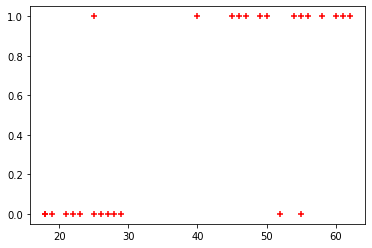

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

df.shape theke 27,2 pele er ortho : we have 27 rows and 2 columns.

In [5]:
df.shape

(27, 2)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [8]:
X_train

,age
12,27
5,56
13,29
15,55
4,46
14,49
11,28
21,26
24,50
9,61


In [9]:
X_test

,age
3,52
17,58
22,40
26,23
16,25
8,62


In [10]:
Y_train

12    0
5     1
13    0
15    1
4     1
14    1
11    0
21    0
24    1
9     1
19    0
10    0
2     1
0     0
7     1
18    0
6     0
23    1
20    0
25    1
1     0
Name: bought_insurance, dtype: int64

In [11]:
Y_test

3     0
17    1
22    1
26    0
16    1
8     1
Name: bought_insurance, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 1])

In [15]:
model.score(X_test, Y_test)

0.5

The 1st probability is for not buying insurance,
2nd one is the probability for buying insurance.

In [16]:
model.predict_proba(X_test)

array([[0.08960284, 0.91039716],
       [0.02680528, 0.97319472],
       [0.556875  , 0.443125  ],
       [0.97889087, 0.02110913],
       [0.96808419, 0.03191581],
       [0.01164713, 0.98835287]])

In [17]:
model.predict([[56]])

array([1])

In [18]:
model.predict([[25]])

array([0])

In [19]:
model.coef_

array([[0.21224857]])

In [20]:
model.intercept_

array([-8.71843176])

In logicstic regression 
y = 1/(1+e^(-(m*x+b)))
model.coef_ indicates value of m in y=m*x + b equation
model.intercept_ indicates value of b in y=m*x + b equation

In [21]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [22]:
def prediction_function(age):
    z = 0.119 * age - 4.939 # 0.11920896 ~ 0.119 and -4.9396666 ~ -4.939
    y = sigmoid(z)
    return y

In [23]:
age = 35
prediction_function(age)

0.31561446181158487

In [24]:
age = 43
prediction_function(age)

0.5443828762475714

Exercise Solution
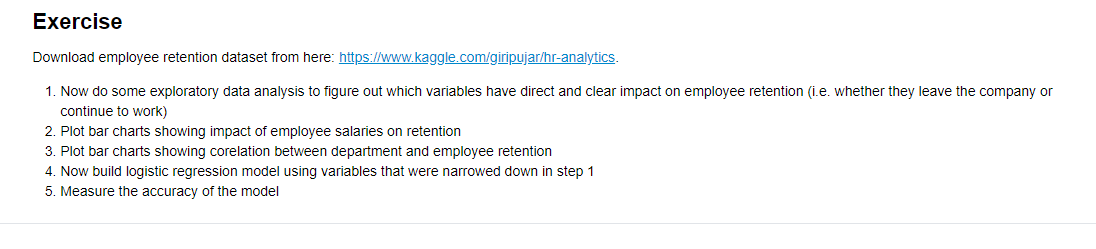

In [25]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
left = df[df.left==1]
left.shape

(3571, 10)

In [27]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [28]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1) **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2) **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3) **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

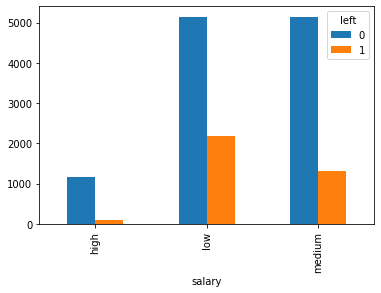

In [29]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

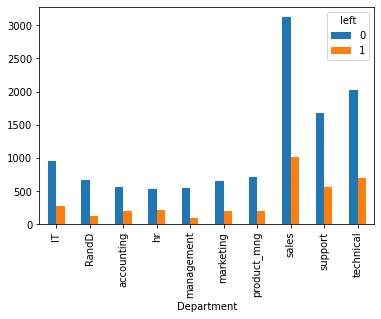

In [30]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis.

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1)  **Satisfaction Level**
2)  **Average Monthly Hours**
3)  **Promotion Last 5 Years**
4)  **Salary**

In [31]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [32]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [33]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [35]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it.

In [36]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [37]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [40]:
Y = df.left

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.3)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

Accuracy of the model is:

In [52]:
model.score(X_test,Y_test)


0.7814285714285715